# Alternating Least Squares Implicit Collaborative Filtering

- https://jessesw.com/Rec-System/
- https://yeomko.tistory.com/3

# 추천
추천이란 데이터를 통해서 사용자가 아직 소비하지 않은 아이템 중 선호할 만한 것을 예측하는 것을 말한다. 
대표적인 추천 알고리즘으로는 **Contents Based Filtering**과 **Collaborative Filtering**이 있다. 
위의 두 알고리즘은 사람이 기준인지, 아이템이 기준인지가 아니라 **어느 데이터를 사용하느냐**에 따라서 구분된다.

-----------------------------------------------------
# Contents Based Filtering
```
사용자 혹은 아이템에 대한 프로필 데이터를 가지고 
내가 좋아했던 아이템과 비슷한 유형의 아이템을 추천하거나 
나와 비슷한 유형의 사람이 좋아하는 아이템을 추천
```
Contents Based Filtering에서는 각각의 사용자와 아이템에 대하여 프로필을 작성하고, 이를 기반으로 추천을 한다.


영화 추천을 예시로 들어보면, 먼저 사용자에 대해 성별, 연령대, 지역 등의 프로필을 작성할 수 있다.\
나와 프로필이 비슷한 다른 사용자가 선호하는 영화를 추천해주는 방식(user-based recommendation)

영화는 장르, 출연하는 배우들, 흥행 여부 등의 프로필을 작성할 수 있다.\
이를 기반으로 특정 영화를 좋아했던 사용자에게 비슷한 영화를 추천해주는 방식(item-based recommendation)

하지만 이런 방식은 데이터 셋을 구성하기가 매우 어려운 한계가 있다.\
영화를 예시로 들어보면 수백만편의 영화에 대하여 일일이 프로필을 작성하는 것은 많은 시간과 비용이 들어간다.\
또한 프로필 데이터 작성 시에 주관성이 개입하는 문제가 있다.\
어떤 영화가 폭력적이거나, 로맨틱하다라는 정보는 개인의 주관에 영향을 받습니다.\
따라서 이러한 정보를 사람이 일일이 입력하여 프로필 데이터를 구성하게 되면, 추천의 객관성이 떨어지게 된다.

# Collaborative Filtering
This is based on the relationship betwwen users and items, with no information about the users or the items required. We need is a rating of some kind for each user/item interaction that occureed where available. There are two kinds of data available for this type of interaction.

```
내가 남긴 평점 데이터를 가지고 나와 취향이 비슷한 사람이 선호하는 아이템을 추천
```

Collaborative Filtering에서는 프로필 데이터 없이, 사용자의 과거 행동 데이터만 가지고 추천을 진행한다.\
도메인에 제약없이 데이터 셋을 쌓기가 쉽다.\
일반적으로 Contents Based Filtering보다 더 정확하다고 알려져 있다.

하지만 신규 사용자의 경우, 관찰된 행동 데이터가 없거나 적기 때문에\
이런 경우 추천의 정확도가 급격히 떨어지는 Cold start 문제가 발생한다.

- Explicit(선호와 비선호를 명확하게 구분해준 데이터 셋) : A score, such as a rating or a like 
- Implicit(선호와 비선호의 구분 없이 행동의 빈도수만 기록한 데이터 셋) : Not as obvious in terms of preference, such as a click, view, or purchase, 호불호 구분 없이 사용자가 아이템을 얼마나 소비하였는지를 기록한 데이터 셋

Explicit Dataset에서 주어진 평점만으로 사용자의 선호/비선호를 알 수 있습니다. \
이 경우 빈 matrix 에 해당하는 데이터들을 제외한 평접 데이터만으로 사용자의 선호도를 학습한 다음 추축은 한다.

**Implicit Dataset**에서는 우리는 사용자가 어떤 아이템을 선호하는지는 알지만, 어떤 아이템을 비선호 하는지는 알지 못한다.\
빈 matrix 안에는 사용자가 좋아하는 아이템이 있을수도 없을 수도 있다.\
때문에 **빈 matirx에 해당하는 영역 역시 데이터로 포함하여 사용자의 선호도를 학습한다.**

## Hybrid Filtering
```
Contents based Filtering + Collaborative Filtering
```

Contents Based Filtering과 Collaborative Filter을 모두 적용하고, 이의 가중평균(Weighted Average)를 구하는 Combining Filtering 기법\
평점데이터와 아이템 프로필을 조합하여 사용자 프로필을 만들어 추천하는 Collaboration via Content 기법\


---------------------------------------------------------------------
Explicit Data와 Implicit Data가 주어졌을 때\
추천시스템 구현 방법으로는 대표적인 방법으로 Neighborhook model과 Latent Factor model이 있다.
## Neighborhood model
평점데이터를 가지고 양의 선형 관계 혹은 음의 선형관계를 계산한다.\
이는 평점 자체에 선호와 비선호가 구분되어 있는 Explicit Dataset에 적합하다. 

#### 1)User-oriented Neighborhood model
주어진 평점 데이터를 가지고 서로 비슷한 유저 혹은 아이템을 찾는다.\
이 때 유사도는 주로 Pearson 상관계수를 통해 구한다.\
피어슨 상관계수는 양으로 변할 때 함께 양으로 변하고, 음으로 변할때 함께 음으로 변하는 정도를 나타낸다.\
예를 들어 평점 데이터를 기반으로 유저 간의 상관도를 계산한다고 해보겠다.\
1에 가까울 수록 서로 유사한 아이템에 높은 선호도를 매긴다고 볼 수 있다.\
이를 통해서 유사한 사용자가 좋아한 아이템을 추천해 줄 수 있다.

#### 2)Item-oriented Neighborhook
아이템 간의 상관관계 역시 분석할 수 있다. 그리고 가장 유사도가 높은 K개의 아이템을 묶어줄 수 있다.\
특정 사용자가 아직 평점을 남기지 않은 아이템을 추천해야할 경우,\
이 K개의 가까운 이웃들에게 사용자가 남긴 평접을 가지고 해당 아이템에 내릴 평점을 예측할 수 있다.


## Latent Factor Model
유저의 비선호도가 반영되지 않은 Implicit Dataset은 Latent Factor model이 더 적합하다.\
Latent Factor Model은 관찰된 데이터와 잠재되어 있는 데이터를 연결시키는 기법이다.\
예를 들어 우리의 상황에 적용하면 주어진 평점 데이터로 아직 알지 못하는 사용자와 아이템의 특성을 찾아내는 것이다.

우리에게 주어진 데이터는 사용자와 평점을 나타내는 커다란 행렬이다.\
사용자와 아이템, 두 Latent Factor를 알아내고자 한다.\
이 경우 커다란 평점 행렬을 사용자와 아이템 Latent Factor로 분해하고,\
이를 각각 학습시키고 Matrix Factorization 기법이 적합하다.

-----------------------------------------------------------------------------------------
## Matrix Factorization
Implicit Dataset이 주어질 경우, Latent Factor model 가운데 Matrix Factorization이 적합하다. 

![latent-factor](../image/latent-factor.png)

$R$ : original rating data matrix \
$N_u$ : number of users \
$N_i$ : number of items

$R$은 사용자가 아이템에 남긴 평점을 행렬로 나타낸 것\
$R$ = $N_u$ x $N_i$

$N_f$ : dimension of latent factor\
$X$ : user lantent factor matrix ($N_f$ x $N_u$)\
$Y$ : item latent factor matrix ($N_f$ x $N_i$)

$N_f$는 Matrix Factorization 학습 시에 정하는 임의의 차원 수이며 보통 50~200 사이로 설정\
$X$, $Y$는 사용자와 아이템의 Latent Factor 행렬을 나타내며 우리가 학습시키고자 하는 대상\
이 행렬들의 값은 아주 작은 랜덤한 값들로 초기화된다.(R에 있는 값을 쪼개어 생성하는 것이 아니다)

$x_u$ : user latent vector of specific index $u$ \
$y_u$ : item latent vaetor of specific index $i$

$x_u$와 $y_i$는 각각 특정 사용자와 특정 아이템의 특징 벡터를 나타낸다.\
여기서 벡터는 1차원 array를 뜻하며 $x_u$, $y_i$는 각각 $N_f$ x 1 크기의 열벡터(column vector)로 볼 수 있다.\
$x_u$를 특정 사용자의 Latent Vector, $y_i$를 특정 아이템의 Latent Vector라고 하겠다.

![latent-vector](../image/latent-vector.png)

$R'$ : predicted rating data matrix

$X$ 행렬의 전치 행렬(Transpose)를 구하면 $N_u$ x $N_f$ 크기의 행렬이 된다.\
이를 $Y$행렬과 곱해주어 $N_u$ x $N_i$ 크기의 평점 예측 행렬을 구한다.\
예측된 하나의 평점 행렬의 각각의 값들은 다음과 같은 곱셈을 통해서 계산된다.
$$
r_{ui} = x_u^Ty_i
$$

해석해보면 특정 사용자의 Latent Vector와 특정 아이템의 Latent Vector를 곱하여 평점을 계산함을 알 수 있다. \
Latent Factor Matrix가 적절하게 학습이 되었다면 예측된 $R'$은 $R$과 유사한 결과를 낼 것이라 예상할 수 있다.

----------------------------------------------------------------
## Loss Function
$X$와 $Y$를 곱하여 얻은 예측 평점 행렬의 오차가 최대한 작아지도록 수식을 구성하면 된다.
$$
\min_{x^*, y^*} \sum_{u, i} c_{ui}(p_{ui} - x_u^Ty_i)^2 
+\lambda (\sum_{u} \Vert x_u \Vert ^2 + \sum_{i} \Vert y_i \Vert ^2) 
$$

수식의 앞 부분은 예측된 평점과 실제 평점 간의 차이를 나타낸다.\
뒷부분 람다 표기가 붙은 부분은 모델이 오버피팅 하지 않도록 정규화 시켜주는 역할을 수행한다.\
즉, 전체 모델에서 파라미터가 미치는 영향력을 감소시켜 줌으로써 모델의 일반화를 돕는다.\
람다의 크기는 데이터 셋마다 달라질 수 있으므로, 여러 실험을 통해 조절해 나가는 것이 바람직 한다.

-----------------------------------------------------
## Optimization
Loss Function을 최소화하도록 $X$와 $Y$를 학습시켜야 한다. 
이러한 최적화를 수행하는 알고리즘으로 Gradient Descent와 Alternating Least Squares 알고리즘이 있다.\

Gradient Descent 적용하는 방식은 간단하다.\
loss를 미분하고, 여기에 learnign rate를 곱한 다음 $X$와 $Y$ 행렬의 값들을 업데이트 해주는 방식이다.\

여기서 우리가 학습시켜야 하는 것은 $X$와 $Y$ 행렬 두개이고, 이 둘은 곱셈으로 묶여있다.($x_u^T$ x $y_i$)\
이 둘을 동시에 최적화 시키는 문제는 Non-convex problem으로 NP에 속한다. \
Gradient Descent로 이를 최적화 시키는 것은 너무 느리고 많은 반복이 필요하다는 단점이 있다.

**Alternatin Least Squares**는 이러한 문제를 해결 할 수 있다.\
$X$와 $Y$ 둘 중 하나를 고정시키고 다른 하나를 최적화 시킨다.\
그리고 이 과정을 번갈아가며 반복하여 짧은 시간 내에 최적의 X와 Y를 찾아낸다.


-----------------------------------------------------------------------
## Alternating Least Squares
Since more data usually means a better model, I will focus on the method included in Spark library used for collaborative filtering, alternating least squared(ALS).

Matrix Factorization와 Latent Factor 그리고 이를 학습시키기 위한 Loss function
Loss Function을 최소화하는 사용자와 아이템의 Latent Factor Matrix를 찾아내는 것이 목표!
이를 학습 시키기 위한 방법으로는 Gradient Descent와 Alaternating Least Squares(ALS)이 있으며 ALS가 더 적합한 방법!

ALS는 **사용자와 아이템의 Latent Factor를 한번씩 번갈아가며 학습시킨다.**
두 행렬을 한꺼번에 최적화시키는 것은 어렵기 때문에 둘 중 하나를 고정시킨다.

아이템의 행렬을 상수로 놓고 사용자의 행렬을 학습시키고,
사용자 행렬을 상수로 놓고 아이템 행렬을 학습시키는 방식이다.

이 과정을 계속 반복하면서 최적의 사용자와 아이템 Latent Factor를 학습

### Loss Function
$$
\min_{x^*, y^*} \sum_{u, i} c_{ui}(p_{ui} - x_u^Ty_i)^2 
+\lambda (\sum_{u} \Vert x_u \Vert ^2 + \sum_{i} \Vert y_i \Vert ^2) 
$$

기존의 Loss Function에서는 단순히 원래 rating에서 예측된 rating을 빼준 값의 제곱을 사용하였다.\
$r_{ui}$ : original rating \
$x_u^Ty_i$ : predicted rating \
$(r_{ui} - x_u^Ty_i)^2$ : previous loss

새로운 Loss Function에서는 $r_{ui}$ 대신 $c_{ui}$와 $p_{ui}$가 새롭게 추가된 것이다.\
이는 평점 예측을 선호도로 나타내는 $p$와 그 예측값의 신뢰도를 나타내는 $c$로 나누어 준것이다.\
$$
p_{ui} = 
\begin{cases}
1 & if r_{ui} > 0 \\
0 & if r_{ui} = 0
\end{cases}
$$
먼저 선호를 나타내는 $p$ 이다. 
Implicit Dataset에서의 평점은 선호와 비선호를 구분하지 않는다. 
때문에 평점 데이터가 존재할 경우 선호함을 나타내는 1, 반대의 경우 0으로 바꾸어줍니다.

$$
c_{ui} = 1 + \alpha r_{ui}
$$
해당 데이터의 신뢰도를 나타내는 $c$입니다.\
우리는 평점이 남아있지 않은 데이터는 모두 0으로 바꾸었다.\
여기에는 실제 선호하지만, 평점이 남아있지 않은 데이터들도 포함되어 있다.\
즉, **데이터의 신뢰도가 낮은 것**으로 볼 수 있다.

Colloaborative Filtering For Implicit Datasets 논문에서는 신뢰도 변수를 도입하여 평점이 남아 있지 않은 데이터에 대한 예측값도 전체 Loss function에 영향을 주도록 만들었다.\
이는 평점이 남아있지 않은 데이터는 모두 학습에서 제외한 Explicit Dataset과 대조적이다.

또한 이러한 데이터는 낮은 $c$값을 갖게하여 loss 포함하되 영향력이 작게끔 조절하였습니다.\
사용자가 높은 평점을 주어 명확하게 선호임을 파악 할 수 있는 경우엔 영향력이 높아지게끔 합니다.

여기서 '어차피 가중치가 낮으면 평점이 0인 데이터는 있으나 마나한거 아닌가?'라는 의문이 들 수 있다.\
하지만 Implicit Dataset을 보면 평점이 낮은 아이템보다 0으로 남아있는 데이터가 훨씬 더 많다.\
이러한 행렬 데이터를 Sparse Matrix라고 한다.

기존에 Explicit Dataset을 다루었던 기법들은 이렇게 0으로 남은 데이터들은 버리고 학습을 진행하였다.\
하지만 앞서 제시한 신뢰도 지수 $c$를 통해서 0으로 남아있는 방대한 아이템들에 대한 예측 값도\
Latent Factor 학습에 포함시킬 수 있게 되었다.

또한 가중치가 낮다 하더라도 그 수가 평점이 남은 아이템들에 비해 월등히 많기 때문에 학습에 유의미한 영향을 미치게 된다. 

### Alternating Least Squares(ALS)
ALS는 먼저 사용자 혹은 아이템의 Latent Factor 행렬을 아주 작은 랜덤 값으로 초기화합니다.\
그 다음 둘 중 하나를 상수처럼 고정시켜 Loss Function을 Convex Function으로 만듭니다.\
그리고 이를 미분한 다음 미분 값을 0으로 만드는 사용자 혹은 아이템의 Latent Factor 행렬을 계산합니다.\
이 과정을 사용자 한번, 아이템 한번 반복하면서 최적의 X, Y를 찾아내는 것입니다.

먼저 아이템의 Latent Factor행렬을 고정하고 사용자의 Latent Factor를 최적화시키는 과정을 살펴보자.\
아이템 행렬을 고정된 상수로 놓고 LossFuction을 미분하면 다음과 같다.\
$$
{\triangle L(x_u) \over \triangle x_u} = -2\sum_{i} C_{ui}(p_{ui} - x_u^Ty_i) \times y_i + 2\lambda x_{u}
$$
이 값이 0이 되는 $X_u$를 찾기 위해서 미분한 식을 전개하면 다음과 같다.\
$$
-2\sum_{i} C_{ui}(p_{ui} - x_u^Ty_i) \times y_i + 2\lambda x_{u} = 0
$$
이를 다시 전개한 다음 좌변 우변을 나누어 정리해주면 다음과 같다.\
$$
\sum_{i} C_{ui}(x_u^Ty_i) \times + \lambda x_{u} = \sum C_{ui}(p_{ui}) \times y_i
$$

여기서 $x_u^Ty_i$를 계산하면 1 X 1 크기의 스칼라 값이 나온다.\
즉 $x_u^Ty_i$의 전치 행렬을 구해도 동일한 스칼라 값이 나오게 된다.

$$
\sum_{i} C_{ui}(y_i^Tx_u) \times y_i + \lambda x_{u} = \sum C_{ui}(p_{ui}) \times y_i
$$

$C_{ui}$ 역시 스칼라 값이기 때문에 뒤에 오는 $y_i^Tx_u$와 순서를 바꾸어도 결과값을 동일하다\

$$
\sum_i C_{ui} \times y_i \times (y_i^Tx_u) + \lambda x_u = \sum_i C_{ui}(p_{ui})  \times y_i
$$
여기서 $x_u$를 밖으로 빼주고 항을 정리하면 다음과 같은 형태가 나온다.\
I는 단위행렬(Identitiy Matrix)이다.

$$
(\sum_{i} C_{ui} \times y_i \times y_i^T + \lambda I)x_u = \sum_i C_{ui}(p_{ui}) \times y_i
$$

먼저 좌변부터 정리해보겠다.\
모든 아이템 갯수만큼 벡터와 스칼라 곱을 수행하는 이 식은 하나의 행렬 곱으로 나타낼 수 있다.\

먼저 원본 Y행렬과 그 전치 행렬을 곱해보았다.\

$$
Y \times Y^T = [y_1y_1^T + y_2y_2^T + \dots + y_iy_i^T]
$$

그 다음 각 $i$에 맞는 신뢰도를 곱해주기 위해서 $C_{ui}$를 diagonal matrix로 만든 다음 그 사이에 곱해주면 된다.

$$
Y = [y_1y_2\dots y_i]
$$

$$
\begin{align}
C = 
\begin{bmatrix}
c_{u1} & 0 & 0 & 0 \\
0 & c_{u1} & 0 & 0 \\
0 & 0 & \dots & 0 \\
0 & 0 & 0 & c_{u1} \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
Y^T =
\begin{bmatrix}
y_1^T \\
y_2^T \\
\dots \\
y_i^T
\end{bmatrix}
\end{align}
$$

$$
Y \times C \times Y^T = [c_{u1}y_1y_1^T + c_{u2}y_2y_2^T + \dots + c_{ui}y_iy_i^T]
$$

우변 역시 비슷한 방식으로 정리하면 다음과 같은 결과를 얻을 수 있다.\

$$
(YC_uY^T + \lambda I)x_u = Y^TC_up(u) 
$$

이제 좌변에 $X_u$만 남기기 위해서 양변에 같은 역행렬을 곱해주면 다음과 같은 식이 나온다.\

$$
x_u = (YC^uY^T + \lambda I)^{-1}Y^TC^up(u) \\
    = (Y^TC^uY + \lambda I)^{-1}T^TC^up(u)
$$

$YC_uY^T$와 $Y^TC_uY$는 결국 계산하면 1X1 크기의 스칼라 값이므로 이 둘은 같다.\
우리는 Loss의 미분 값을 0으로 만드는 $X_u$ 행렬을 찾아낸 것이다.

이제 X를 위 식을 통해 계산한 다음 업데이트를 해준다.\
다음으로 사용자 행렬 X를 고정시키고, 아이템에 대하여 같은 작업을 반복하여 같은 형태의 수식을 얻을 수 있다.

$$
y_i = (X^TCX + \lambda I)^{-1}X^TC^ip(i)
$$

이를 통해 Y행렬을 계산하여 업데이트 해준다.\
이과정을 반복하면서 최적의 X와 Y를 찾아내는 것이 ALS 알고리즘의 핵심이다. 

보통 반복하는 횟수를 10회에서 15회 정도로 설정합니다.\
하지만 데이터의 양이나 Sparse 정도에 따라서 조절해나가는 것이 바람직하다.

## Processing the Data

In [1]:
import pandas as pd
import scipy.sparse as sparse
import numpy as np
from scipy.sparse.linalg import spsolve

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.set_option('display.max.colwidth', 80)

In [2]:
# df_action = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv', parse_dates=['sess_dt'])
df_transaction = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv', parse_dates=['de_dt'])
# df_client_demo = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
df_product = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

In [3]:
# convert df_product['pd_c'] datatype : int -> object
df_product['pd_c'] = df_product['pd_c'].apply(lambda num: "{:04n}".format(num))

# df_transaction and df_prodcct merge!
df_transaction = pd.merge(df_transaction, df_product, how='left')
print(df_transaction.shape)

(599961, 12)


In [4]:
# pd_c가 unknown은 drop
df_transaction = df_transaction.dropna().reset_index(drop=True)
print(df_transaction.shape)
df_transaction.head()

(582283, 12)


,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
0,39423,105124,13,A03,0565,2019-09-20,17:26,2990,1,Fruits,Imported Fruits,Bananas
1,21279,104907,1,A03,0565,2019-09-20,10:27,2990,1,Fruits,Imported Fruits,Bananas
2,48969,104882,5,A03,0572,2019-09-20,10:05,7490,1,Fruits,Imported Fruits,Kiwi
3,30533,103245,5,A03,0670,2019-09-20,14:36,49800,1,Grains,Rice,Rice
4,64346,104317,1,A03,0543,2019-09-20,22:34,26900,1,Fruits,Domestic Fruits,Pears


In [5]:
# clac_nm1 + clac_nm2 + clac_nm3 
df_transaction = df_transaction.assign(product_nm = df_transaction.clac_nm1 + ',' + \
                                      df_transaction.clac_nm2 + ',' + df_transaction.clac_nm3)

In [6]:
df_transaction

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3,product_nm
0,39423,105124,13,A03,0565,2019-09-20,17:26,2990,1,Fruits,Imported Fruits,Bananas,"Fruits,Imported Fruits,Bananas"
1,21279,104907,1,A03,0565,2019-09-20,10:27,2990,1,Fruits,Imported Fruits,Bananas,"Fruits,Imported Fruits,Bananas"
2,48969,104882,5,A03,0572,2019-09-20,10:05,7490,1,Fruits,Imported Fruits,Kiwi,"Fruits,Imported Fruits,Kiwi"
3,30533,103245,5,A03,0670,2019-09-20,14:36,49800,1,Grains,Rice,Rice,"Grains,Rice,Rice"
4,64346,104317,1,A03,0543,2019-09-20,22:34,26900,1,Fruits,Domestic Fruits,Pears,"Fruits,Domestic Fruits,Pears"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582278,35311,2839,3,B03,0339,2019-09-27,14:09,3500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks,"Cosmetics / Beauty Care,Skin Care,Facial Masks"
582279,35311,2839,4,B03,0339,2019-09-27,14:09,3600,2,Cosmetics / Beauty Care,Skin Care,Facial Masks,"Cosmetics / Beauty Care,Skin Care,Facial Masks"
582280,35311,2839,5,B03,0339,2019-09-27,14:09,3500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks,"Cosmetics / Beauty Care,Skin Care,Facial Masks"
582281,35311,2839,2,B03,0339,2019-09-27,14:09,4500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks,"Cosmetics / Beauty Care,Skin Care,Facial Masks"


In [7]:
df = df_transaction[['clnt_id', 'pd_c', 'buy_ct', 'product_nm']]
df.head()

,clnt_id,pd_c,buy_ct,product_nm
0,39423,0565,1,"Fruits,Imported Fruits,Bananas"
1,21279,0565,1,"Fruits,Imported Fruits,Bananas"
2,48969,0572,1,"Fruits,Imported Fruits,Kiwi"
3,30533,0670,1,"Grains,Rice,Rice"
4,64346,0543,1,"Fruits,Domestic Fruits,Pears"


In [8]:
# Convert client_id and product_number into numerical IDs
df['clnt_id_cat'] = df['clnt_id'].astype('category').cat.codes
df['pd_c_cat'] = df['pd_c'].astype('category').cat.codes
df

,clnt_id,pd_c,buy_ct,product_nm,clnt_id_cat,pd_c_cat
0,39423,0565,1,"Fruits,Imported Fruits,Bananas",6164,562
1,21279,0565,1,"Fruits,Imported Fruits,Bananas",3284,562
2,48969,0572,1,"Fruits,Imported Fruits,Kiwi",7572,569
3,30533,0670,1,"Grains,Rice,Rice",4754,667
4,64346,0543,1,"Fruits,Domestic Fruits,Pears",9999,540
...,...,...,...,...,...,...
582278,35311,0339,1,"Cosmetics / Beauty Care,Skin Care,Facial Masks",5486,337
582279,35311,0339,2,"Cosmetics / Beauty Care,Skin Care,Facial Masks",5486,337
582280,35311,0339,1,"Cosmetics / Beauty Care,Skin Care,Facial Masks",5486,337
582281,35311,0339,1,"Cosmetics / Beauty Care,Skin Care,Facial Masks",5486,337


In [9]:
item_lookup = df[['pd_c', 'pd_c_cat', 'product_nm']].drop_duplicates().reset_index(drop=True)
item_lookup['pd_c_cat'] = item_lookup.pd_c_cat.astype(str)
item_lookup

,pd_c,pd_c_cat,product_nm
0,0565,562,"Fruits,Imported Fruits,Bananas"
1,0572,569,"Fruits,Imported Fruits,Kiwi"
2,0670,667,"Grains,Rice,Rice"
3,0543,540,"Fruits,Domestic Fruits,Pears"
4,0182,181,"Chilled Foods,Chilled Instant Foods,Chilled Soups"
...,...,...,...
1660,0328,326,"Cosmetics / Beauty Care,Men's Care,Men's Sun Protection / Makeup Goods"
1661,0690,687,"Health Care,Health Electronics,Juicer"
1662,0689,686,"Health Care,Health Electronics,Boiling Pot for Medicine / Red Ginseng Extrac..."
1663,1078,1075,"Personal Care,Shaving Accessories,Classic Shaving Accessories"


In [10]:
user_lookup = df[['clnt_id', 'clnt_id_cat']].drop_duplicates().reset_index(drop=True)
user_lookup['clnt_id_cat'] = user_lookup.clnt_id_cat.astype(str)
user_lookup

,clnt_id,clnt_id_cat
0,39423,6164
1,21279,3284
2,48969,7572
3,30533,4754
4,64346,9999
...,...,...
11265,24053,3724
11266,20610,3186
11267,16091,2507
11268,31304,4868


In [11]:
df1 = df.copy()
df1 = df1.drop(['clnt_id', 'pd_c'], axis=1)
df1.head()

,buy_ct,product_nm,clnt_id_cat,pd_c_cat
0,1,"Fruits,Imported Fruits,Bananas",6164,562
1,1,"Fruits,Imported Fruits,Bananas",3284,562
2,1,"Fruits,Imported Fruits,Kiwi",7572,569
3,1,"Grains,Rice,Rice",4754,667
4,1,"Fruits,Domestic Fruits,Pears",9999,540


In [12]:
# Replace a sum of zero purchases with a one to indicate purchased
df1.buy_ct.loc[df1.buy_ct == 0] = 1 

In [13]:
# Create lists of all clnt_id, pd_c and their purchase counts
customers = list(np.sort(df1.clnt_id_cat.unique()))
products = list(np.sort(df1.pd_c_cat.unique()))
quantity = list(df1.buy_ct)

In [14]:
len(customers), len(products), len(quantity) 

(11270, 1665, 582283)

In [15]:
rows = df1.clnt_id_cat.astype(int)
cols = df1.pd_c_cat.astype(int)

# Create a sparse matrix for our customers and products containing number of purchases
purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products)))

In [16]:
purchases_sparse

<11270x1665 sparse matrix of type '<class 'numpy.int64'>'
	with 327638 stored elements in Compressed Sparse Row format>

In [17]:
matrix_size = purchases_sparse.shape[0] * purchases_sparse.shape[1]
# Number of items interacted with 
num_purchases = len(purchases_sparse.nonzero()[0])
sparsity = 100 * (1 - (num_purchases/matrix_size))
sparsity

98.25395226637463

### Instead of representing an explicit rating, the purchase quantity can represent a "confidence" in terms of how strong the interaction was.

### Creating a Traning and Validation Set

In [18]:
import random

This will return our training set, a test set that has been binarized to 0/1 for purchased/not purchased, and a list of which users had at least one item masked. We will test the performance of the recommender system on these users only. I am masking 20% of the user/item interactions for this example.

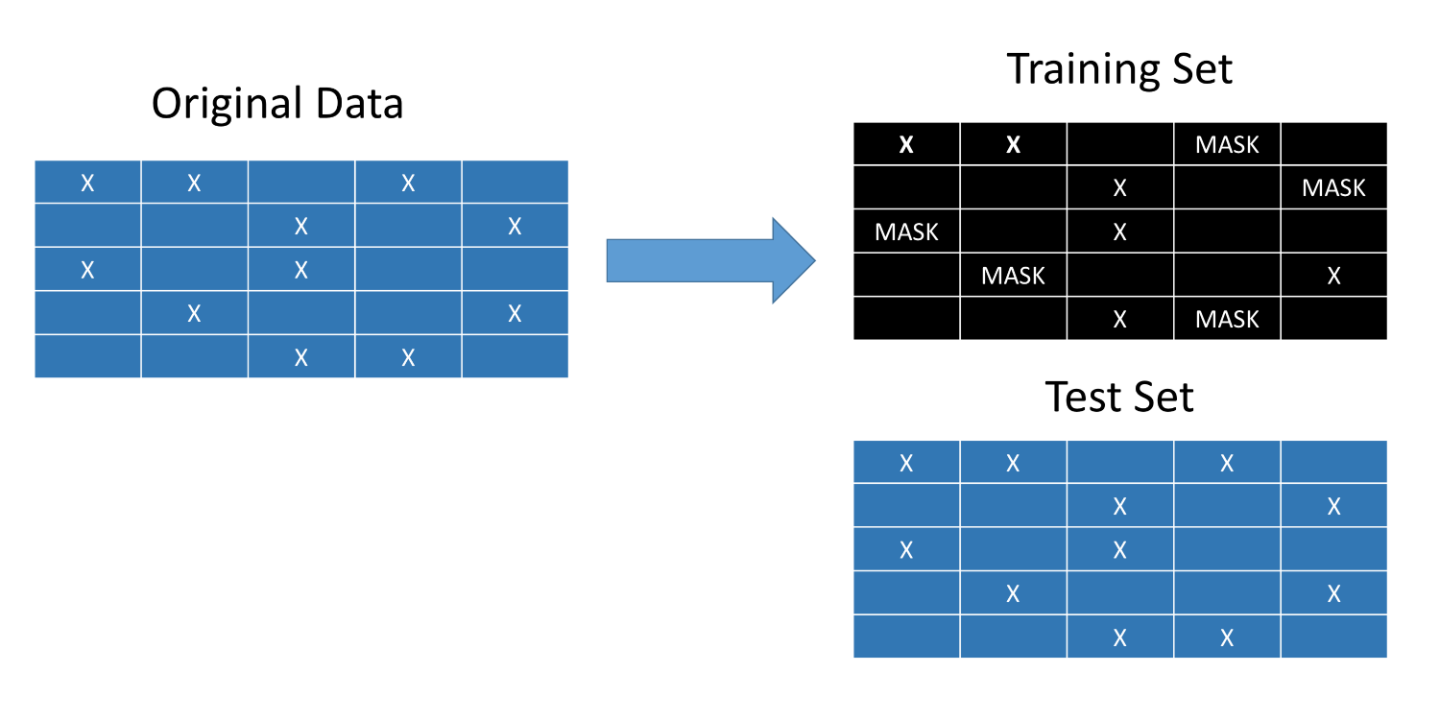

In [19]:
from PIL import Image
image = Image.open('../image/train-test-image.png')
image

In [20]:
def make_train(ratings, pct_test=0.2):
    '''
    This function will take in the original user-item matrix and "mask" a percentage of the original ratings where a
    user-item interaction has taken place for use as a test set. The test set will contain all of the original ratings, 
    while the training set replaces the specified percentage of them with a zero in the original ratings matrix. 
    
    parameters: 
    
    ratings - the original ratings matrix from which you want to generate a train/test set. Test is just a complete
    copy of the original set. This is in the form of a sparse csr_matrix. 
    
    pct_test - The percentage of user-item interactions where an interaction took place that you want to mask in the 
    training set for later comparison to the test set, which contains all of the original ratings. 
    
    returns:
    
    training_set - The altered version of the original data with a certain percentage of the user-item pairs 
    that originally had interaction set back to zero.
    
    test_set - A copy of the original ratings matrix, unaltered, so it can be used to see how the rank order 
    compares with the actual interactions.
    
    user_inds - From the randomly selected user-item indices, which user rows were altered in the training data.
    This will be necessary later when evaluating the performance via AUC.
    '''
    # Make a copy of the original set to be the test set. 
    test_set = ratings.copy()
    # Store the test set as a binary preference matrix
    test_set[test_set != 0] = 1
    # Make a copy of the original data we can alter as our training set.
    training_set = ratings.copy()
    # Find the indices in the ratings data where an interaction exists
    nonzero_inds = training_set.nonzero() 
    # Zip these pairs together of user,item index into list
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1]))
    # Set the random seed to zero for reproducibility
    random.seed(0)
    # Round the number of samples needed to the nearest integer
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs)))
    # Sample a random number of user-item pairs without replacement
    samples = random.sample(nonzero_pairs, num_samples)
    # Get the user row indices
    user_inds = [index[0] for index in samples]
    # Get the item column indices
    item_inds = [index[1] for index in samples]
    # Assign all of the randomly chosen user-item pairs to zero
    training_set[user_inds, item_inds] = 0 
    # Get rid of zeros in sparse array storage after update to save space
    training_set.eliminate_zeros()
    
    # Output the unique list of user rows that were altered 
    return training_set, test_set, list(set(user_inds))

In [21]:
product_train, product_test, product_users_altered = make_train(purchases_sparse, pct_test=0.2)

In [22]:
product_train.shape, product_test.shape

((11270, 1665), (11270, 1665))

In [23]:
len(product_users_altered)

9059

we have our ratings matrix which is sparse (represented by the product_train sparse matrix object). We need to turn this into a confidence matrix.
\begin{equation} 
C_{ui} = 1 + \alpha r_{ui}
\end{equation}
Where $C_{ui}$ is the confidence matrix for our users $u$ and our items $i$. The $\alpha$ term represents a linear scaling of the rating preferences (in our case number of purchases) and the $r_{ui}$ term is our original matrix of purchases. The paper sugests 40 as a good starting poin.

In ALS we iteratively compute user_vectors(U_i) and item vectors(Y_i) using the below formula:
\begin{equation} 
X_u = ((Y.T*Y + Y.T*(Cu-I)*Y) + \lambda*I)^{-1}*(X.T*Cu*p(u))
\end{equation}
\begin{equation} 
Y_m = ((X.T*X + X.T*(Cm-I)*X) + \lambda*I)^{-1}*(Y.T*Cm*p(m))
\end{equation}
**Where:**
1. **X and Y** : X is the user matrics and Y is the item matrix. In ALS these matrices will be updated alternatingly.
2. **Cu and Cm** : Cunfidence values for users and items
3. **Lambda($\lambda$)** : Regularizer value. Generally used to reduce overfitting in a machine learning model(we're using 0.1)
4. **p(u) and p(m)** : Ther preference for an item(binary). If known then preference is 1 and zero if not known.
5. **I(Identity/np.eye)** : The identity matrix. Square matrix with ones at the diagonal elements and zeros everywhere else.

In [24]:
def implicit_weighted_ALS(training_set, lambda_val=0.1, alpha=40, iterations=10, rank_size=20, seed=0):
    '''
    Implicit weighted ALS taken from Hu, Koren, and Volinsky 2008. Designed for alternating least squares and implicit
    feedback based collaborative filtering. 
    
    parameters:
    
    training_set - Our matrix of ratings with shape m x n, where m is the number of users and n is the number of items.
    Should be a sparse csr matrix to save space. 
    
    lambda_val - Used for regularization during alternating least squares. Increasing this value may increase bias
    but decrease variance. Default is 0.1. 
    
    alpha - The parameter associated with the confidence matrix discussed in the paper, where Cui = 1 + alpha*Rui. 
    The paper found a default of 40 most effective. Decreasing this will decrease the variability in confidence between
    various ratings.
    
    iterations - The number of times to alternate between both user feature vector and item feature vector in
    alternating least squares. More iterations will allow better convergence at the cost of increased computation. 
    The authors found 10 iterations was sufficient, but more may be required to converge. 
    
    rank_size - The number of latent features in the user/item feature vectors. The paper recommends varying this 
    between 20-200. Increasing the number of features may overfit but could reduce bias. 
    
    seed - Set the seed for reproducible results
    
    returns:
    
    The feature vectors for users and items. The dot product of these feature vectors should give you the expected 
    "rating" at each point in your original matrix. 
    '''
    
    # first set up our confidence matrix
    
    # To allow the matrix to stay sparse, I will add one later when each row is taken and converted to dence
    conf = (alpha*training_set) 
    num_user = conf.shape[0]
    # Get the size of our original ratings matrix, m X n 
    num_item = conf.shape[1]
    
    # initialize our X/Y feature vectors randomly with a set seed
    rstate = np.random.RandomState(seed)
    
    # Random numbers in a m x rank shape
    X = sparse.csr_matrix(rstate.normal(size = (num_user, rank_size)))
    # Normally this would be rank x n but we can transpose at the end. Makes calculation more simple.
    Y = sparse.csr_matrix(rstate.normal(size = (num_item, rank_size)))
    
    X_eye = sparse.eye(num_user)
    Y_eye = sparse.eye(num_item)
    # Our regularization term lambda * I
    lambda_eye = lambda_val * sparse.eye(rank_size)
    
    # We can compute this before iteration starts.
    
    # Begin iterations
    
    # Iterate back and forth between solving X given fixed Y and vice verse
    for iter_step in range(iterations): 
        # Compute yTy and xTx at begining of each iteration to save computing time
        yTy = Y.T.dot(Y)
        xTx = X.T.dot(X)
        
        # Being iteration to solve for X based on fixed Y 
        for u in range(num_user):
            # Grab user row from confidence matrix and convert to dence
            conf_samp = conf[u, :].toarray()
            pref = conf_samp.copy()
            pref[pref != 0] = 1  # Create binarized preference vector 
            CuI = sparse.diags(conf_samp, [0]) # Get Cu - I term, don't need to subtract 1 since we never added it 
            yTCuIY = Y.T.dot(CuI).dot(Y) # This is the yT(Cu-I)Y term
            yTCupu = Y.T.dot(CuI + Y_eye).dot(pref.T) # This is the yTCuPu term, where we add the eye back in Cu - I + I = Cu
            X[u] = spsolve(yTy + yTCuIY + lambda_eye, yTCupu)
            # Solve for Xu = ((yTy + yT(Cu-I)Y + lambda*I)^-1)yTCuPu, equation 4 from the paper
            
        # Begin iteration to solve for Y based on fixed X
        for i in range(num_item):
            conf_samp = conf[:, i].T.toarray() # Transpose to get it in row format and convert to dense
            pref = conf_samp.copy()
            pref[pref != 0] = 1 # Create binarized preference vector
            CiI = sparse.diags(conf_samp, [0]) # Get Ci-I term, don't need to subtract 1 since we never added it
            xTCiIX = X.T.dot(CiI).dot(X) # This is the xT(Cu-I)X term
            xTCiPi = X.T.dot(CiI + X_eye).dot(pref.T) # this is the xTCiPi term
            Y[i] = spsolve(xTx + xTCiIX + lambda_eye, xTCiPi)
            # Solve for Yi = ((xTx + xT(Cu-I)X + lambda*I)^-1)xTCiPi, equtation 5 from paper
            
        # End iterations
        # Transpose at the end to make up for not being transposed at the begining.
        # Y needs to be rank x n. Keep these as separate matrices for scale reasons 
        return X, Y.T  

In [25]:
user_vecs, item_vecs = implicit_weighted_ALS(product_train, lambda_val=0.1, alpha=15, iterations=10, rank_size=20)

In [26]:
user_vecs[0, :].dot(item_vecs).toarray()[0, :10]

array([-1.33408327e-05, -2.28037402e-05, -7.61884224e-05, -1.90207270e-05,
        2.53300634e-05, -8.19165333e-04, -1.15635051e-04, -5.99899293e-05,
       -1.28550810e-05, -5.97824888e-05])

In [27]:
user_vecs_test, item_vecs_test = implicit_weighted_ALS(product_test, lambda_val=0.1, alpha=15, iterations=10, rank_size=20)

In [28]:
user_vecs_test[0, :].dot(item_vecs_test).toarray()[0, :10]

array([-1.18564526e-05,  6.71768666e-06, -5.29323537e-06,  4.68469384e-06,
       -4.91950125e-05, -1.89847643e-04, -6.94899161e-06, -3.79486540e-05,
       -6.59277176e-06,  2.32977313e-05])

### Evaluating the Recommender System

In [29]:
from sklearn import metrics

In [30]:
def auc_score(predictions, test):
    '''
    This simple function will output the area under the curve using sklearn's metrics. 
    
    parameters:
    
    - predictions: your prediction output
    
    - test: the actual target result you are comparing to
    
    returns:
    
    - AUC (area under the Receiver Operating Characterisic curve)
    '''
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)

In [31]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):
    '''
    This function will calculate the mean AUC by user for any user that had their user-item matrix altered. 
    
    parameters:
    
    training_set - The training set resulting from make_train, where a certain percentage of the original
    user/item interactions are reset to zero to hide them from the model 
    
    predictions - The matrix of your predicted ratings for each user/item pair as output from the implicit MF.
    These should be stored in a list, with user vectors as item zero and item vectors as item one. 
    
    altered_users - The indices of the users where at least one user/item pair was altered from make_train function
    
    test_set - The test set constucted earlier from make_train function
    
    
    
    returns:
    
    The mean AUC (area under the Receiver Operator Characteristic curve) of the test set only on user-item interactions
    there were originally zero to test ranking ability in addition to the most popular items as a benchmark.
    '''
    # An empty list to store the AUC for each user that had an item removed from the trainig set
    store_auc = [] 
    # To store popular AUC scores
    popularity_auc = []
    # Get sum of item iterations to find most popular 
    pop_items = np.array(test_set.sum(axis=0)).reshape(-1)
    item_vecs = predictions[1]
    # Iterate through each user that had an item altered 
    for user in altered_users:
        training_row = training_set[user,:].toarray().reshape(-1)# Get sum of item iteractions to find most popular
        zero_inds = np.where(training_row == 0) # Find where the interaction had not yet occurred
        
        # Get the predicted values based on our user/item vectors
        user_vec = predictions[0][user,:]
        pred = user_vec.dot(item_vecs.T).toarray()[0, zero_inds].reshape(-1)
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        actual = test_set[user,:].toarray()[0, zero_inds].reshape(-1)
        # Select the binarized yes/no interaction pairs from the original full data
        # that align with the same pairs in training
        pop = pop_items[zero_inds] # Get the item popularity for our chosen items
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
        
    # End users iteration
    
    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))
    # Return the mean AUC rounded to there decimal places for both test and popularity benchmark
        

In [32]:
# AUC for our recommender system
calc_mean_auc(product_train, product_users_altered, [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], product_test)

(0.799, 0.891)

Our recommender system had a mean AUC of 0.80, while the popular item benchmark had a higher AUC of 0.89. 

### A Recommendation Example
Let's examine the recommendations given to a particular user and decide subjectively if they make any sense.

we need to find a way of retrieving the items already purchased by a user in the training set. Initially, we will create an array of our customers and items we made earlier.

In [33]:
# Array of customer IDs from the ratings matrix
customers_arr = np.array(customers)
# Array of product IDs from the ratings matrix
products_arr = np.array(products)

In [34]:
def get_items_purchased(customer_id, mf_train, user_lookup, item_lookup):
    '''
    This just tells me which items have been already purchased by a specific user in the training set. 
    
    parameters: 
    
    customer_id - Input the customer's id number that you want to see prior purchases of at least once
    
    mf_train - The initial ratings training set used (without weights applied)
    
    customers_list - The array of customers used in the ratings matrix
    
    products_list - The array of products used in the ratings matrix
    
    item_lookup - A simple pandas dataframe of the unique product ID/product descriptions available
    
    returns:
    
    A list of item IDs and item descriptions for a particular customer that were already purchased in the training set
    '''
    # Returns the customer_id_cat 
    cust_id_cat = user_lookup.loc[user_lookup['clnt_id'] == customer_id].clnt_id_cat.values.astype(int) 
    # Get column pd_c_cat of purchased items
    pd_c_cat = purchases_sparse[cust_id_cat, :].nonzero()[1].astype(str) # Get column indices of purchased items

    return item_lookup.loc[item_lookup.pd_c_cat.isin(pd_c_cat)]

In [35]:
get_items_purchased(39423, product_train, user_lookup, item_lookup)

,pd_c,pd_c_cat,product_nm
0,0565,562,"Fruits,Imported Fruits,Bananas"
2,0670,667,"Grains,Rice,Rice"
4,0182,181,"Chilled Foods,Chilled Instant Foods,Chilled Soups"
7,0538,535,"Fruits,Domestic Fruits,Grapes"
12,1566,1563,"Vegetables,Fruit Vegetables,Cucumbers"
23,0348,346,"Dairy Products,Milk,Functional Milk"
24,0355,353,"Dairy Products,Yogurt,Yogurt Drinks"
26,0171,170,"Chilled Foods,Chilled Beverages,Chilled Coffee and Tea Beverages"
27,0350,348,"Dairy Products,Processed Dairy Products,Cheese"
29,0518,516,"Frozen Foods,Frozen Instant Foods,Frozen Korean Pancakes"


What items does the recommender system say this customer should purchase? We need to create another function that does this. Let’s also import the MinMaxScaler from scikit-learn to help with this.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
def rec_items(customer_id, mf_train, user_vecs, item_vecs, user_lookup, item_lookup, num_items=10):
    '''
    This function will return the top recommended items to our users 
    
    parameters:
    
    customer_id - Input the customer's id number that you want to get recommendations for
    
    mf_train - The training matrix you used for matrix factorization fitting
    
    user_vecs - the user vectors from your fitted matrix factorization
    
    item_vecs - the item vectors from your fitted matrix factorization
    
    customer_list - an array of the customer's ID numbers that make up the rows of your ratings matrix 
                    (in order of matrix)
    
    item_list - an array of the products that make up the columns of your ratings matrix
                    (in order of matrix)
    
    item_lookup - A simple pandas dataframe of the unique product ID/product descriptions available
    
    num_items - The number of items you want to recommend in order of best recommendations. Default is 10. 
    
    returns:
    
    - The top n recommendations chosen based on the user/item vectors for items never interacted with/purchased
    '''
    # Returns the index row of our customer id
    clnt_id_cat = user_lookup.loc[user_lookup['clnt_id'] == customer_id].clnt_id_cat.values.astype(int) 
    # Get the ratings from the training set ratings matrix
    pref_vec = mf_train[clnt_id_cat,:].toarray()
    # Add 1 to everythings, so that items not purchased yet become equal to 1 
    pref_vec = pref_vec.reshape(-1) + 1
    # Make everything already purchased zero
    pref_vec[pref_vec > 1] = 0
    # Get dot product of user vector and all item vectors
    rec_vector = user_vecs[clnt_id_cat,:].dot(item_vecs).toarray()
    
    # Scale this recommendation vector between 0 and 1
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0] 
    recommend_vector = pref_vec*rec_vector_scaled
    
    # Items already purchased have their recommendation multiplied by zero
    # Sort the indices of the items into order
    pd_c_cat = np.argsort(recommend_vector)[::-1][:num_items]
    # of best recommendations
    rec_product = [] # start empty list to store items
    rec_product_scores = []
    for index in pd_c_cat:
        rec_product.append(item_lookup.product_nm.loc[item_lookup.pd_c_cat == str(index)].iloc[0])
        rec_product_scores.append(recommend_vector[index])
    recommendations = pd.DataFrame({'recommend_items': rec_product, 'recommend_scores': rec_product_scores})
    return recommendations

In [44]:
rec_items(48969, product_train, user_vecs, item_vecs, user_lookup, item_lookup,
                       num_items = 10)

,recommend_items,recommend_scores
0,"Snack Foods,Snacks,General Snacks",0.899909
1,"Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops",0.874311
2,"Cleaning / Laundry / Bathroom Accessories,Cleaning Accessories,Trash Bags",0.869339
3,"Meats,Eggs,Chicken Eggs",0.825099
4,"Frozen Foods,Ice Creams,Bar Ice Creams",0.811160
5,"Cosmetics / Beauty Care,Beauty Tools / Accessories,Makeup Brushes",0.797277
6,"Cosmetics / Beauty Care,Makeup,Makeup Base / Primer",0.797016
7,"Frozen Foods,Ice Creams,Tube Ice Creams",0.793721
8,"Beverages,Water,Water",0.709444
9,"Frozen Foods,Ice Creams,Cone Ice Creams",0.680939


In [43]:
rec_items(48969, product_test, user_vecs, item_vecs, user_lookup, item_lookup,
                       num_items = 10)

,recommend_items,recommend_scores
0,"Snack Foods,Snacks,General Snacks",0.899909
1,"Kids' Clothing,Girls' Upper Bodywear / Tops,Girls' T-shirts / Tops",0.874311
2,"Cleaning / Laundry / Bathroom Accessories,Cleaning Accessories,Trash Bags",0.869339
3,"Frozen Foods,Ice Creams,Bar Ice Creams",0.811160
4,"Cosmetics / Beauty Care,Beauty Tools / Accessories,Makeup Brushes",0.797277
5,"Cosmetics / Beauty Care,Makeup,Makeup Base / Primer",0.797016
6,"Frozen Foods,Ice Creams,Tube Ice Creams",0.793721
7,"Beverages,Water,Water",0.709444
8,"Frozen Foods,Ice Creams,Cone Ice Creams",0.680939
9,"Tenants / Restaurants,Restaurants,Coffee / Drinks",0.599947
